# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. This project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from internet using pandas!

First we need to start with the proper imports.

### The Imports

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Therefore we will create data frame for each of these stocks using their ticker symbol and datetime to set start and end datetime objects

In [31]:
#using STOOQ finance
from datetime import datetime
import os
start = datetime(2006, 1, 1)
end = datetime(2016,1,1)

#to reverse the order of index we reindex the data

# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)
BAC = BAC.reindex(index=BAC.index[::-1])

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)
C = C.reindex(index=C.index[::-1])

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)
GS = GS.reindex(index=GS.index[::-1])


# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)
JPM = JPM.reindex(index=JPM.index[::-1])

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)
MS = MS.reindex(index=MS.index[::-1])

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)
WFC = WFC.reindex(index=WFC.index[::-1])

**Created a list called tickers of the ticker symbols (as strings) in alphabetical order**

In [32]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Used pd.concat to concatenate on axis 1 the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [34]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1, keys = tickers )
#We add keys to create multilevel index
bank_stocks.head()

BAC                                           C          \
              Open    High     Low   Close      Volume    Open    High   
Date                                                                     
2006-01-03  40.981  41.205  40.308  41.120  18658143.0  431.01  434.32   
2006-01-04  41.051  41.263  40.570  40.684  20331205.0  429.79  431.88   
2006-01-05  40.684  40.903  40.458  40.737  16971119.0  426.06  429.05   
2006-01-06  40.875  40.971  40.485  40.675  14419805.0  429.95  430.10   
2006-01-09  40.806  41.025  40.492  40.702  17882700.0  427.47  428.70   

                                       ...      MS                          \
               Low   Close     Volume  ...    Open    High     Low   Close   
Date                                   ...                                   
2006-01-03  423.15  433.55  1748134.0  ...  39.536  40.445  39.233  40.320   
2006-01-04  425.26  425.53  2127119.0  ...  40.595  40.994  40.352  40.352   
2006-01-05  425.71  427.62  1290703.0  ...  40.352  40.518  40.117  40.462   
2006-01-06  423.96  427.62  1557821.0  ...  40.642  40.693  40.144  40.502   
2006-01-09  424.82  425.62  1910873.0  ...  40.541  41.002  40.533  40.926   

                          WFC                                      
               Volume    Open    High     Low   Close      Volume  
Date                                                               
2006-01-03  6454836.0  23.520  23.801  23.223  23.743  14801667.0  
2006-01-04  9576975.0  23.665  23.680  23.339  23.467  14604966.0  
2006-01-05  6936221.0  23.444  23.482  23.301  23.444  13612309.0  
2006-01-06  8270878.0  23.507  23.645  23.363  23.576  11291370.0  
2006-01-09  4975275.0  23.576  23.680  23.482  23.576   7550515.0  

[5 rows x 30 columns]

***Setting the column name levels***

In [38]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head() #checking the head again

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.981  41.205  40.308  41.120  18658143.0  431.01  434.32   
2006-01-04   41.051  41.263  40.570  40.684  20331205.0  429.79  431.88   
2006-01-05   40.684  40.903  40.458  40.737  16971119.0  426.06  429.05   
2006-01-06   40.875  40.971  40.485  40.675  14419805.0  429.95  430.10   
2006-01-09   40.806  41.025  40.492  40.702  17882700.0  427.47  428.70   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   423.15  433.55  1748134.0  ...  39.536  40.445  39.233  40.320   
2006-01-04   425.26  425.53  2127119.0  ...  40.595  40.994  40.352  40.352   
2006-01-05   425.71  427.62  1290703.0  ...  40.352  40.518  40.117  40.462   
2006-01-06   423.96  427.62  1557821.0  ...  40.642  40.693  40.144  40.502   
2006-01-09   424.82  425.62  1910873.0  ...  40.541  41.002  40.533  40.926   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6454836.0  23.520  23.801  23.223  23.743  14801667.0  
2006-01-04   9576975.0  23.665  23.680  23.339  23.467  14604966.0  
2006-01-05   6936221.0  23.444  23.482  23.301  23.444  13612309.0  
2006-01-06   8270878.0  23.507  23.645  23.363  23.576  11291370.0  
2006-01-09   4975275.0  23.576  23.680  23.482  23.576   7550515.0  

[5 rows x 30 columns]

# EDA

**Explored the data using [Multi-Level Indexing]) and [Using .xs]**

In [40]:
# Max Close price for each bank's stock throughout the time period
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     47.949
C      496.170
GS     211.900
JPM     60.015
MS      61.752
WFC     48.701
dtype: float64

**Evaluated the returns for each bank's stock. Returns of a stock is defined by the following formula:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$



**First created an empty data frame called returns then used pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [41]:
returns = pd.DataFrame(index = bank_stocks.index)

In [42]:
for i in range(len(tickers)):
    temp = bank_stocks[tickers[i]]['Close'].pct_change()
    returns = pd.concat([returns,temp], axis = 1)
returns.columns = ['BAC Return', 'C Return','GS Return','JPM Return', 'MS Return','WFC Return']
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010603,-0.018498,-0.013618,-0.014233,0.000794,-0.011624
2006-01-05,0.001303,0.004912,-0.000368,0.003034,0.002726,-0.000980
2006-01-06,-0.001522,0.000000,0.013903,0.007081,0.000989,0.005630
2006-01-09,0.000664,-0.004677,0.012078,0.016208,0.010469,0.000000


## Visualizations

**Created Pairplot using seaborn on returns dataframe created above**

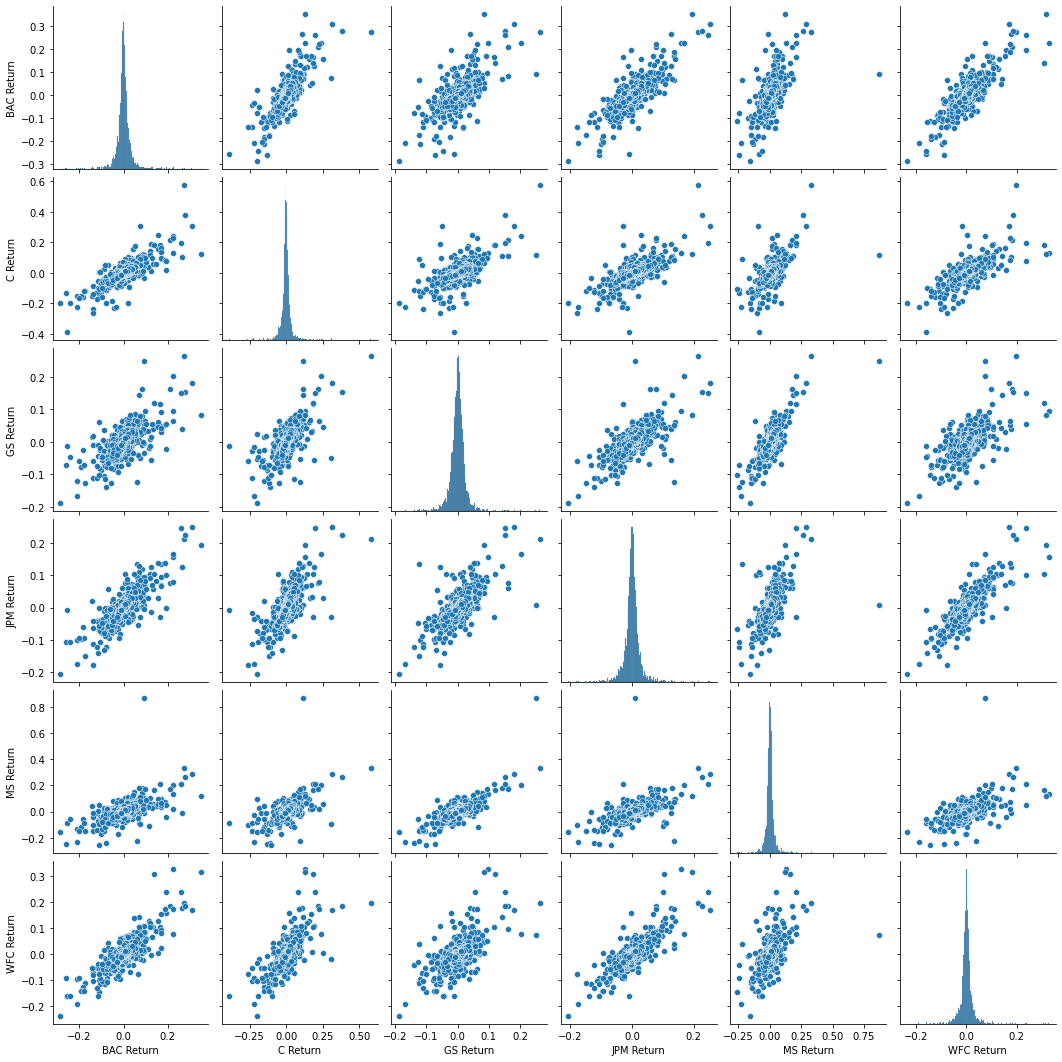

In [43]:
import seaborn as sns
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.**

In [46]:
#dates of maximum return
display(returns.idxmin())

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**we notice that 4 of the banks share the same day for the worst drop '2009-01-20', seems like something significant happened on that day, maybe a stock market crash**

In [21]:
#dates of maximum return
display(returns.idxmax())

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Taking a look at the standard deviation of the returns for each stock over the entire time period**

In [22]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

**since the citibank stock has shown the maximum standard deviation over the entire time period, we can say that it is the riskiest stock to invest money in**

**Evaluate riskiest stock of 2015**

In [47]:
#riskiest stock of 2015
from datetime import datetime
returns.loc['2015-01-01':'2016-01-01'].std()

BAC Return    0.016146
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016008
WFC Return    0.012549
dtype: float64

**It appears that all the stocks have Very similar risk profiles, but Morgan Stanley or BofA were a little bit more riskier options than other bank stocks in year 2015**

**Now checking the distribution of the 2015 returns for Morgan Stanley**

/Users/raghubhaskar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS Return', ylabel='Density'>

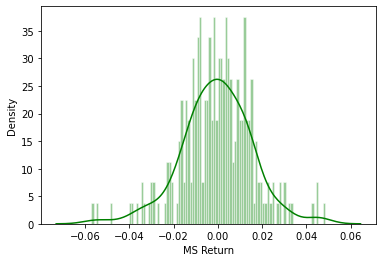

In [48]:
sns.distplot(returns.loc['2015-01-01': '2016-01-01']['MS Return'], color = 'green', bins = 100, hist_kws = dict(edgecolor = 'white'))

**The returns for Morgan Stanley looks like normally distributed**

**Now creating a distplot using seaborn of the 2008 returns for CitiGroup**

/Users/raghubhaskar/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C Return', ylabel='Density'>

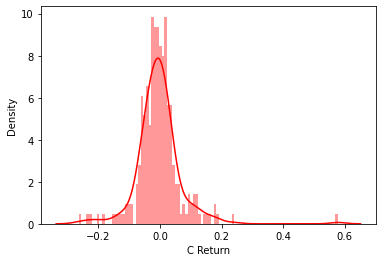

In [49]:
sns.distplot(returns.loc['2008-01-01':'2009-01-01']['C Return'], color = 'red', bins = 100)

**The returns of 2018 for city bank also looks like normally distributed**

____
# More Visualization

In [50]:
#Required libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time**

<AxesSubplot:xlabel='Date'>

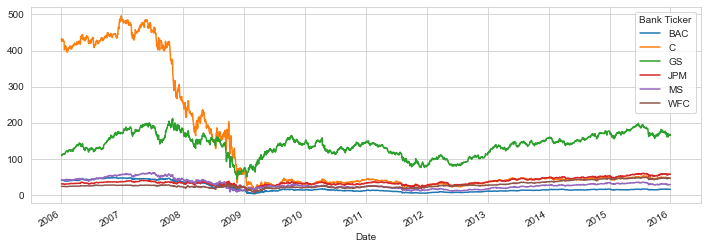

In [51]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').plot.line(figsize = (12,4))

**We saw the cost of City Bank stock crashing around 2008**

**plotting more interactive graph with the help of plotly**

In [54]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').iplot(kind = 'line')

## Moving Averages

**Analyzing the moving averages for these stocks in the year 2008 by Ploting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

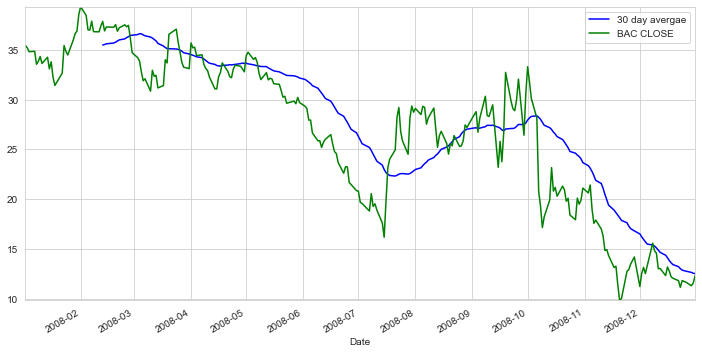

In [55]:
plt.figure(figsize = (12,6))
BAC['Close'].loc['2008-01-01': '2009-01-01'].rolling(window=30).mean().plot(label = '30 day avergae', color = 'blue')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC CLOSE', color = 'green')
plt.legend()
plt.margins(0)

**Using plotly to plot the same chart. In plotly we have inbuilt function for moving averages**

In [56]:
BAC['Close'].loc['2008-01-01': '2009-01-01'].ta_plot(study = 'sma', periods = 30)

**Checking the correlation between the stocks Close Price among the banks with help of a Heat Map and Cluster Map**

Text(34.0, 0.5, 'Bank Ticker')

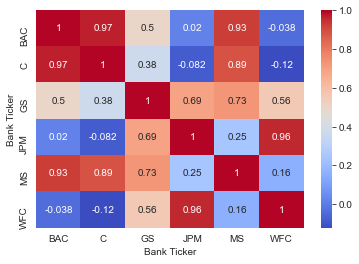

In [58]:
#Heat map
sns.heatmap(bank_stocks.xs('Close', level = 'Stock Info', axis = 1).corr(), annot= True, cmap='coolwarm')
plt.xlabel('Bank Ticker')
plt.ylabel('Bank Ticker')

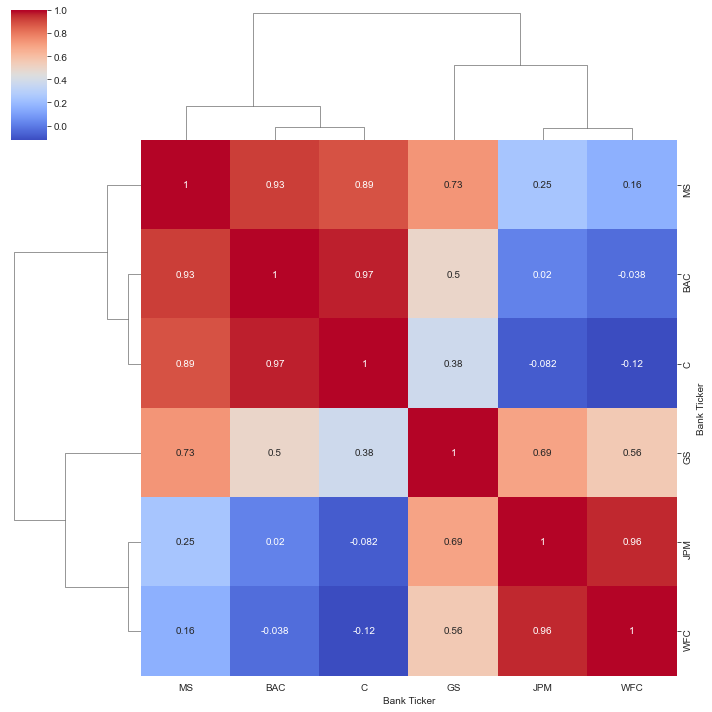

In [59]:
#Cluster Map
sns.clustermap(bank_stocks.xs('Close', level = 'Stock Info', axis = 1).corr(), annot= True, cmap='coolwarm')

# Using cufflinks library to create some Technical Analysis plot

**candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [60]:
BAC.loc['2015-01-01':'2016-01-01'][['Open', 'High', 'Low', 'Close']].iplot(kind = 'candle')

**Creating a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [61]:
MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study = 'sma', periods = [13,21,55])

**Creating a Bollinger Band Plot for Bank of America for the year 2015.
Bollinger Band plot is inspired from the technical analysis tool developed by John Bollinger for generating oversold or overbought signals.
There are 3 lines that compose this plot: A simple moving average (middle band) and an upper and lower band.
The upper and lower bands are typically 2 standard deviations +/- from a 20-day simple moving average, but can be modified**

In [62]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll')